In [32]:
import datetime as dt
import os
import xarray as xr
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import functions.common as cf
import calendar
import seaborn as sns
from matplotlib import dates as mdates
from matplotlib.colors import ListedColormap

In [27]:
# Read in Data
df = pd.read_excel('/users/jameskim/Documents/rucool/BPU/upwelling_master.xlsx')

# Replace 0s with NaN in the specified column
df['Upwelling'] = df['Upwelling'].replace(0, float('nan'))

# Replace 'Year' with NaN where 'Upwelling' is NaN
df['Year'] = df['Year'].mask(df['Upwelling'].isna(), float('nan'))


In [28]:
# Combine 'Month' and 'Day' to create a new column 'Date'
df['Date'] = df['Month'] + df['Day'].astype(str)

# Convert the 'Date' column to datetime format for proper sorting
df['Date'] = pd.to_datetime(df['Date'], format='%B%d')


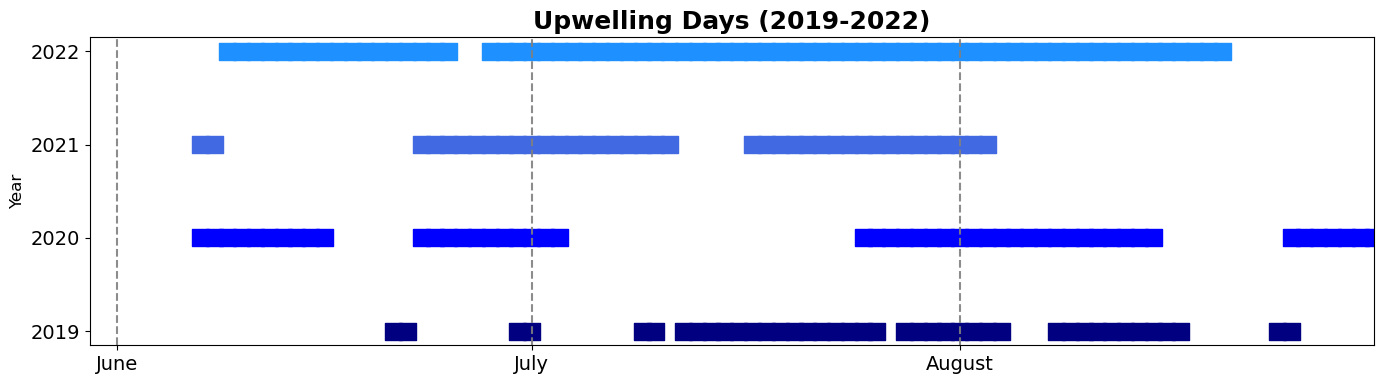

In [53]:

# Plotting
plt.figure(figsize=(14, 4))

# Define a color map based on years
year_cmap = ListedColormap(['navy','blue', 'royalblue', 'dodgerblue'])

# Scatter plot for upwelling events
# Scatter plot for upwelling events
scatter = plt.scatter(df['Date'], df['Year'], c=df['Year'].astype('category').cat.codes, cmap=year_cmap, marker='s', s=150)


# Set labels and title
plt.ylabel('Year')
plt.title(('Upwelling Days (2019-2022)'), fontweight = 'bold', fontsize = 18)

# Set x-axis ticks to the first day of each month and format to display only the month name
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

# Adjust x-axis label font size
plt.xticks(fontsize=14)
plt.yticks(fontsize =14)

# Adjust x-axis limits to move the first day of June off the y=0 axis
plt.xlim(df['Date'].min() - pd.DateOffset(days=2), df['Date'].max()+pd.DateOffset(days=0))

# Set y-axis ticks to integer values
plt.locator_params(axis='y', integer=True)

# Add vertical lines at x-axis ticks
for tick in plt.gca().get_xticks():
    plt.axvline(x=tick, color='gray', linestyle='--', alpha=0.9)

plt.tight_layout()